## KERNEL PERCEPTRON

Binary Classifier for classification to {-1,+1}

$w=\sum_i\alpha_iy_ix_i$

$f(x')=sign \sum_i\alpha_iy_iK(x_i,x')$ Decision Function

for Missclassified Points $y_i(\sum_j\alpha_jy_jK(x_i,x_j)+b)<0$

### PERCEPTRON ALGORITHM Batch Gradient Descent

<b>INITIALIZE</b>: $\alpha$=zeors()<br>
<b>REPEAT</b>: for each [x,y]<br>
<b>IF </b> $sign(\sum_j\alpha_jy_jK(x_i,x_j)+b)\neq sign(y_i)$<br>
<b>THEN  </b>$\alpha_i=\alpha_i+1$



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

data=pd.read_csv('dataset/non_linear.csv')
data.head()

X=data[['x','y']]
Y=data['label']

Populating the interactive namespace from numpy and matplotlib


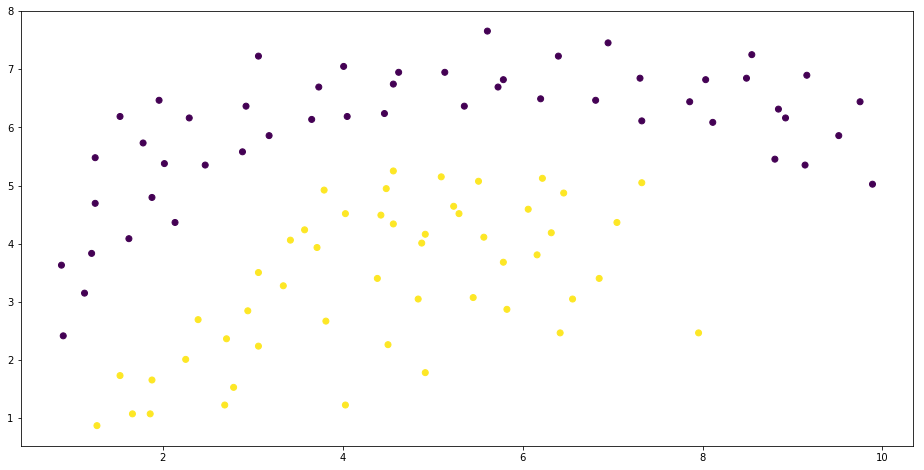

In [4]:
plt.scatter(X['x'],X['y'],c=Y)

In [20]:
class perceptron():
    def __init__(self,mode='batch',lr=0.01,max_step=12):
        self._mode=mode
        self._lr=lr
        self._max_step=max_step
        self._phi=None
        self._alpha=None
        self._y=None
        self._x=None
    
#     def augment(self,x):
#         x=np.hstack((x,np.ones(len(x)).reshape((len(x),1))))
#         return x
    
    #polynomial kernel
    def kernel(self,x):
        x.shape=(1,len(x))
        return (1+np.dot(self._x,x.T))**5
    
    #fit
    def fit(self,X,Y):
        self._phi=X.as_matrix()
        self._y=Y
        self._alpha=np.ones(self._phi.shape[0])
        self.sgd()
    
    #stochastic gradient descent
    def sgd(self):
        for i in range(self._max_step):
            for j in range(len(self._phi)):
                self._x=self._phi[j].reshape((1,self._phi.shape[1]))
                k=np.apply_along_axis(self.kernel, 1, self._phi)
                a=np.multiply(self._y,self._alpha)
                k=np.dot(a.T,k)
                if k*self._y[j] < 0:
                    self._alpha[j]+=1
        self.draw_boundary()
        print("<<DONE TRAINING>>")
        
    #predict
    def predict(self,x):
        if type(x)!=type(self._phi):
            x=x.as_matrix()
        predictions=[]
        for e in x:
            self._x=e
            k=np.apply_along_axis(self.kernel, 1, self._phi)
            a=np.multiply(self._y,self._alpha)
            k=np.dot(a.T,k)
            predictions.append(k)
        res=np.array(predictions)
        def label(x):
            if x>=0:
                return 1
            else:
                return -1
        f=np.vectorize(label)
        return f(res).flatten()
   
        
    def draw_boundary(self):
        h=1
        # create a mesh to plot in
        x_min, x_max = self._phi[:, 0].min() - 1, self._phi[:, 0].max() + 1
        y_min, y_max = self._phi[:, 1].min() - 1, self._phi[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        fig, ax = plt.subplots()
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        ax.scatter(self._phi[:, 0], self._phi[:, 1], c=self._y.as_matrix(), cmap=plt.cm.coolwarm, s=40, edgecolors='k')

        ax.set_title('Kernel Perceptron')
        plt.show()

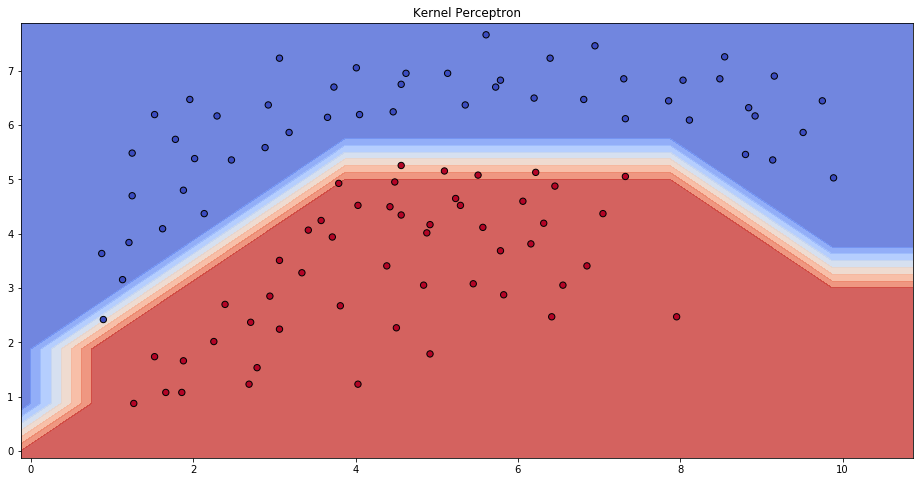

<<DONE TRAINING>>


In [21]:
p=perceptron(max_step=31)
#Fit model with Data
p.fit(X,Y)

### Kernel Perceptron Fitting 
<img src="imgs/non_linear_perceptron_fit.gif">